### Project 2

In [15]:
import pandas as pd 
import sklearn as skl 
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = r"../data/prj2/creditcard_2023.csv"

df = pd.read_csv(file_path)
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
data = df.dropna(subset=['Class'])

In [ ]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X, y
# data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = model.predict(x_test)

In [9]:
print("Report KNN:")
print(classification_report(y_test, y_pred))


Report KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37457
           1       0.92      0.81      0.86        74

    accuracy                           1.00     37531
   macro avg       0.96      0.91      0.93     37531
weighted avg       1.00      1.00      1.00     37531



In [10]:
print("Accuraacy score", accuracy_score(y_test, y_pred))


Accuraacy score 0.999493751831819


### 2.2

Text(0, 0.5, 'Accuracy Score')

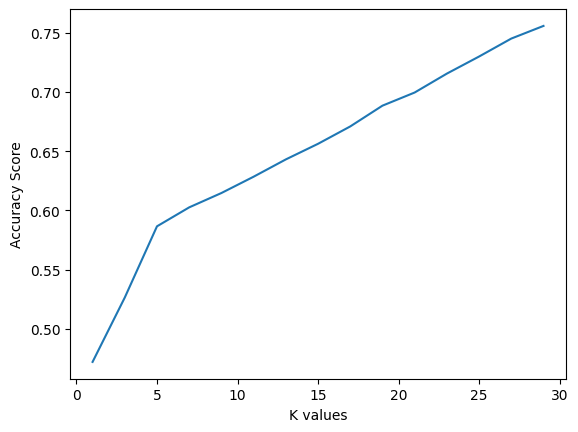

In [18]:
scores = []
k_values = [k for k in range(1, 31) if k % 2 != 0]

def check_scores(k_values, metric = 'minkowski'):
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        score = cross_val_score(knn, X, y, cv=5)
        scores.append(np.mean(score))

check_scores(k_values)
sns.lineplot(x = k_values, y = scores, markers='o')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')


### 2.3

Text(0, 0.5, 'Accuracy Score')

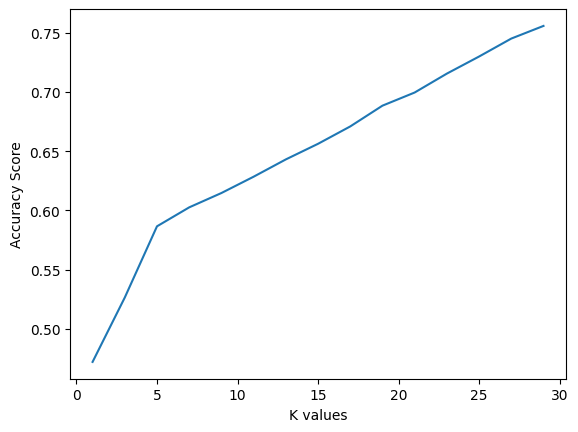

In [21]:
scores = []

check_scores(k_values, 'euclidean')
sns.lineplot(x = k_values, y = scores, markers='o')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')

# k_values
